In [102]:
library(tidyverse)
options(repr.plot.width=5, repr.plot.height=4)

# STATS 306
## Homework 4: Exploratory data analysis

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Whisker plots
Suppose you are given the following whisker plot for $n=200$ samples of a random variable $x$:
![whiser](https://i.imgur.com/HazzZQQ.png)

**(a)** About how many samples were between .1 and .2?

**(b)** The upper whisker extends to about $x=0.5$. Explain how this is calculated.

**(c)** What do the dots at the top and bottom of the plot signify?

## Problem 2: Understanding air quality
This problem uses the air quality dataset that we studied in lecture:

In [87]:
load(url('https://datasets.stats306.org/pm25.RData'))

For each of the questions, produce an appropriate plot that visualizes the distribution or statistic, and explain why this type of plot is appropriate. (Note: multiple correct answers are possible.)

**(a)** The overall distribution of `pm25` across the entire dataset.

**(b)** The joint distribution of `pm25` and day of the week.

**(c)** The average PM25 level for each year and state.

**(d)** The joint distribution of pm25 and air quality index (`aqi`).

**(e)** The US EPA considers PM2.5 levels greater than $35 \mu g/m^3$ to be dangerous. Plot the number of dangerous days for each state.

**(f)** Define a location to be _northern_ if it is above 39N and east of 109W; _southern_ if it is below 39N and east of 109W; and _western_ if it is west of 109W. Plot the number of dangerous air days for northern, southern, and western states, using the definition of dangerous from the previous question.

## Problem 3: College football
The next few questions use a new data set. The file `cfb.RData` contains a table called `cfb` with information on 5,116 college football games played from 2011 to 2017:

In [103]:
load(url('https://datasets.stats306.org/cfb.RData'))
head(cfb)

year,game,count,conf_game,week,winning,winning_conference,winning_h_a_n,winning_points,winning_f_u,⋯,losing_total_plays,losing_total_yards,losing_ypp,losing_to,losing_pen_yards,losing_top,ot?,thursday?,top_verification,o_u_total
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>
2011,1,1,Y,1,FIU,Sun Belt,H,41,F,⋯,73,301,4.12,1,45,1967,N,Y,3600,NA
2011,2,1,N,1,Wisconsin,Big 10,H,51,F,⋯,65,292,4.49,0,65,2060,N,Y,3600,NA
2011,3,1,N,1,Mississippi State,SEC,A,59,F,⋯,87,338,3.89,3,55,2240,N,Y,3600,NA
2011,4,1,N,1,Syracuse,Big East,H,36,F,⋯,84,406,4.83,1,94,2024,Y,Y,3600,NA
2011,5,1,N,1,Bowling Green,MAC,A,32,U,⋯,65,280,4.31,3,45,1181,N,Y,3600,NA
2011,6,1,N,1,Kentucky,SEC,N,14,F,⋯,69,234,3.39,4,120,2040,N,Y,3600,NA


(Each row of the table is one game, and contains various statistics for both the winning and losing teams.)

**(a)** College football is divided into various conferences. (UM is in the Big Ten conference.) A conference game is a game where the `winning_conference` and `losing_conference` are the same. For example, row 4631 of CFB is a conference game between Western Michigan and Buffalo, both in the Mid-American Conference. A total of 139 points were scored:

In [18]:
cfb %>% slice(4631) %>% 
    select(winning, winning_conference, winning_points, 
           losing, losing_conference, losing_points)

winning,winning_conference,winning_points,losing,losing_conference,losing_points
<chr>,<chr>,<int>,<chr>,<chr>,<int>
W. Michigan,MAC,71,Buffalo,MAC,68


Certain conferences have a reputation for being higher scoring. Investigate this by restricting to conference games and producing a box-and-whisker plot that shows the distribution of total number of points scored per game (ppg) by conference. Ensure that the conference names in the plot are legible, and sort the conferences in order of the median ppg. Which conference had the highest scores? The lowest? Do you think these differences are real, or arose due to chance?

(*Note*: your plot may reveal a data entry error in the `cfb` table. If so, fix it.)

**(b)** Using the techniques we learned in class for summarizing and reshaping data, create a new table which contains the average passing and rushing yardage for each year for each team. If we sort such a table chronologically and in alphabetical order of team name, the first few rows are:

    # A tibble: 877 × 4
        year team           `mean(pass_yards)` `mean(rush_yards)`
       <int> <chr>                       <dbl>              <dbl>
     1  2011 Air Force                   139.               282. 
     2  2011 Akron                       156.                98.7
     3  2011 Alabama                     217.               210. 
     4  2011 Arizona                     367.                96.3

In [37]:
# one solution
avg_yards <- cfb %>% select(year, winning_team=winning, losing_team=losing,
               winning_pass_yards, winning_rush_yards, 
               losing_pass_yards, losing_rush_yards) %>% 
    pivot_longer(-year, names_to = c("w", ".value"), names_pattern = "(winning|losing)_(.*)") %>% 
    group_by(year, team) %>% summarize(mean(pass_yards), mean(rush_yards)) %>% ungroup %>% arrange(year, team) %>% print

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


# A tibble: 877 × 4
    year team           `mean(pass_yards)` `mean(rush_yards)`
   <int> <chr>                       <dbl>              <dbl>
 1  2011 Air Force                   139.               282. 
 2  2011 Akron                       156.                98.7
 3  2011 Alabama                     217.               210. 
 4  2011 Arizona                     367.                96.3
 5  2011 Arizona State               314.               130. 
 6  2011 Arkansas                    295.               140. 
 7  2011 Arkansas State              295.               137. 
 8  2011 Army                         52.3              331. 
 9  2011 Auburn                      155.               177. 
10  2011 Ball State                  241                138. 
# … with 867 more rows


**(c)** Some teams rely more on passing to gain yardage, while other rely more on rushing. Create an appropriate 
plot that visualizes the joint distribution of passing and rushing yardage for each team over the whole season. 
In your opinion, are there any outliers? What are they? Is there any reason for them to be outlying? 

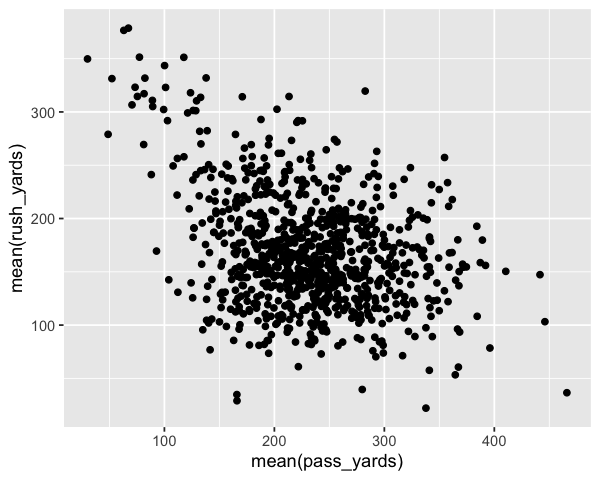

In [38]:
ggplot(avg_yards) + geom_point(aes(x=`mean(pass_yards)`, y=`mean(rush_yards)`))

## Problem 4 (Challenge problem) 
The column `winning_h_a_n` shows whether the winning team was playing at **H**ome, **A**way, or on a **N**eutral field (not home to either team). Overall, what proportion of games did the home team win? Is this statistically different from proportion of games won by the away team?

(Hint: In STATS 250 you learned how to test this. This test is implemented in R using the `binom.test` function.)